In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('EmployeeSkills_Normalized_Tanjeem.csv')
df['annual_salary'] = pd.read_csv('SalaryTarget_Tanjeem.csv')['annual_salary']
df.head(5)

,experience_years,education_level,num_certifications,technical_score,communication_score,leadership_score,teamwork_score,problem_solving,projects_led,client_feedback,annual_salary
0,16.1,3.0,6.0,59.4,79.0,77.6,50.2,70.4,6.0,3.51,31425.072057
1,12.9,3.0,4.0,64.7,56.5,67.1,63.2,91.9,6.0,2.51,21550.917559
2,14.1,1.0,4.0,73.3,64.2,62.3,78.4,64.2,5.0,3.41,21204.079699
3,14.8,1.0,8.0,57.7,79.6,66.6,75.3,70.8,6.0,2.31,18911.556822
4,21.0,3.0,7.0,80.5,57.0,61.9,59.2,62.8,3.0,2.97,26862.680971


In [4]:
train = df.iloc[:580]
test  = df.iloc[-20:]

X_train = train.iloc[:, :-1]
y_train = train.iloc[:,  -1]
X_test  = test .iloc[:, :-1]
y_test  = test .iloc[:,  -1]

model = LinearRegression()
model.fit(X_train, y_train)
r2 = model.score(X_test, y_test)

print(f"• Test R²: {r2:.4f}")
print(f"– This means the model explains {r2*100:.2f}% of the variance in the annual salaries")

• Test R²: 0.7145
– This means the model explains 71.45% of the variance in the annual salaries


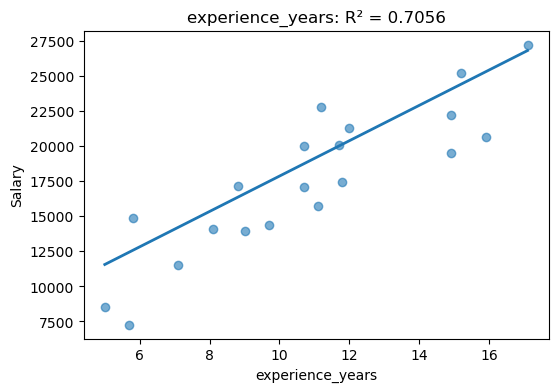

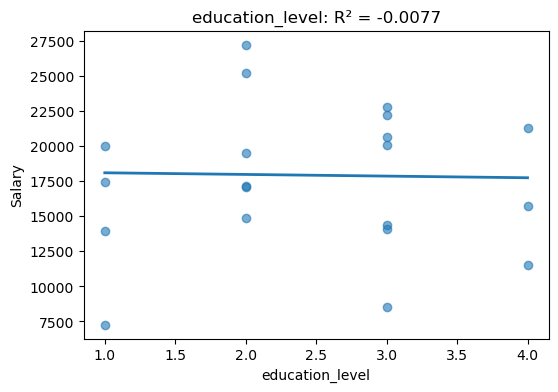

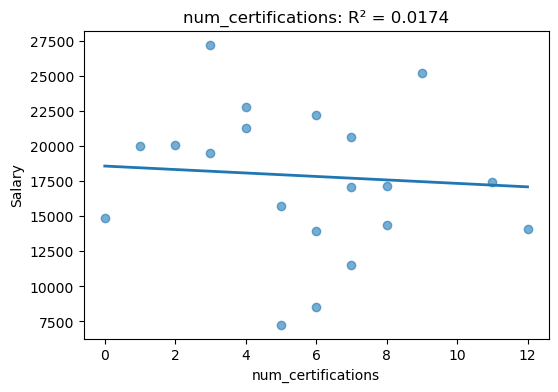

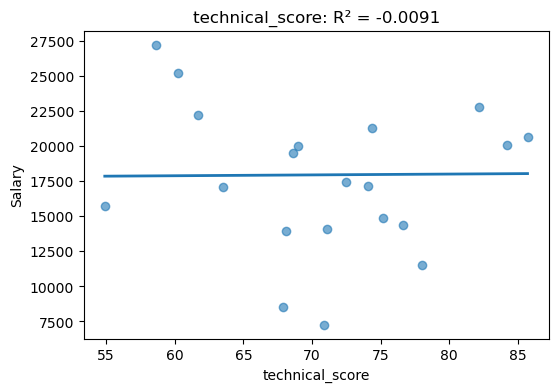

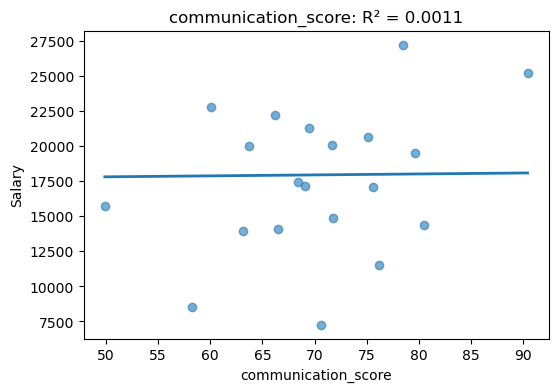

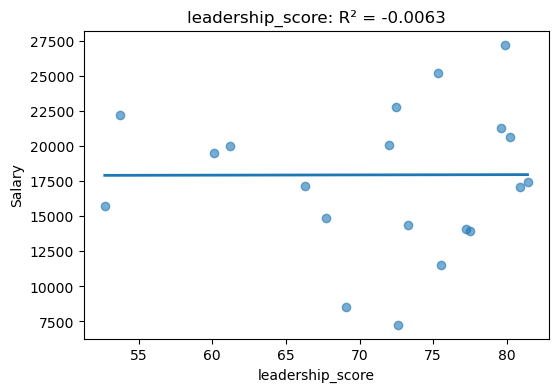

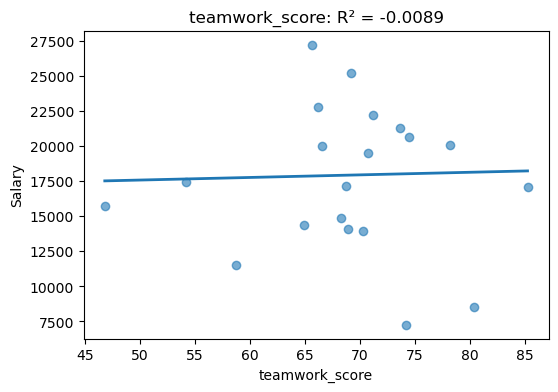

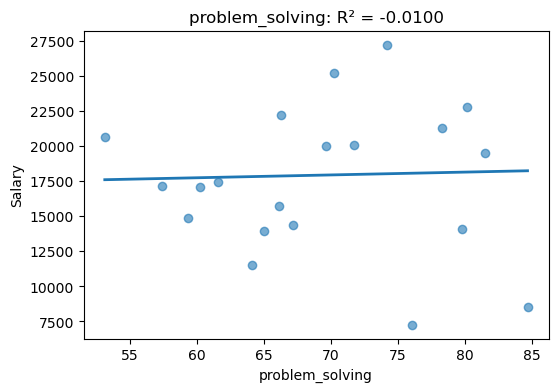

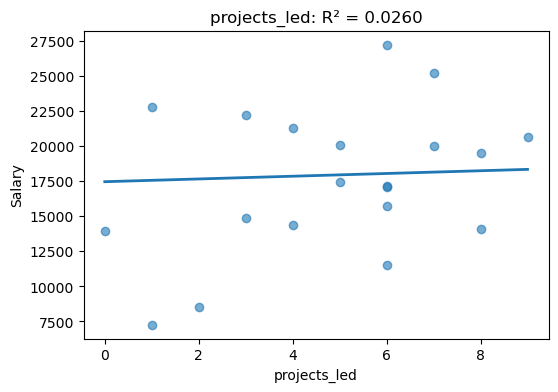

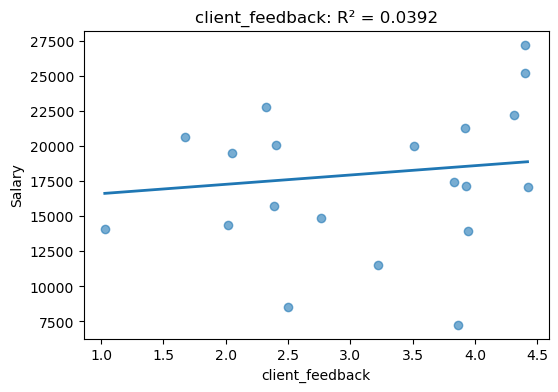

In [5]:
feature_r2 = {}
for feat in X_train.columns:
   
    Xi_train = X_train[[feat]]
    Xi_test  = X_test[[feat]]

    m = LinearRegression().fit(Xi_train, y_train)
    r2 = m.score(Xi_test, y_test)
    feature_r2[feat] = r2

   
    plt.figure(figsize=(6, 4))
    plt.scatter(Xi_test, y_test, alpha=0.6)

  
    x_min, x_max = Xi_test[feat].agg(['min', 'max'])
    xs = np.linspace(x_min, x_max, 100)
    xs_df = pd.DataFrame(xs, columns=[feat])
    ys = m.predict(xs_df)

    plt.plot(xs, ys, linewidth=2)
    plt.title(f"{feat}: R² = {r2:.4f}")
    plt.xlabel(feat)
    plt.ylabel("Salary")
    plt.show()

In [6]:
top3 = sorted(feature_r2, key=feature_r2.get, reverse=True)[:3]
print(f"• Top 3 most predictive features based on R² scores: \n–{', '.join(top3)}")


model_top3 = LinearRegression().fit(X_train[top3], y_train)
print(f"• New model built using only the top 3 features:", model_top3)


r2  = model.score(X_test, y_test)
r2_top3  = model_top3.score(X_test[top3], y_test)
print(f"• Comparison of the R² test with the full model:")
print(f"– Full model test R²: {r2:.4f}")
print(f"– Top 3 model test R²:  {r2_top3:.4f}")
print(f"Therefore, the top 3 model test's R² 0.7095 captures almost the same variance as the full model's R² 0.7145") 

• Top 3 most predictive features based on R² scores: 
–experience_years, client_feedback, projects_led
• New model built using only the top 3 features: LinearRegression()
• Comparison of the R² test with the full model:
– Full model test R²: 0.7145
– Top 3 model test R²:  0.7095
Therefore, the top 3 model test's R² 0.7095 captures almost the same variance as the full model's R² 0.7145
